In [208]:
import pandas as pd
import csv
from emotion_predictor import EmotionPredictor
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
path = '/Users/kavyasuresh/DS/Social-Stocking/Data set/MSFT/'
df = pd.read_csv(path+"MSFT_stock.csv") 

inp = pd.read_csv("test.csv")
close = []    
all_dates = []
for i,row in inp.iterrows():
    c = 0
    dates = row[0].split(" ")[0].split("-")
    if int(dates[2]) < 10:
        dates[2]  = dates[2].strip("0")
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    all_dates.append(date)
    f = df.loc[df['timestamp'] == date]
    close.append(f['close'].values[0])
inp['close'] = close
inp['date'] = all_dates
for i,row in inp.iterrows():
    print(row)
    c = c+1
    if c == 2:
        break

In [334]:
topic_df = pd.read_csv(path+"MSFT_topic.csv", index_col=0)
emo_df = pd.read_csv(path+"output_emo_MSFT.csv", index_col=0)
emo_df = emo_df[1:]
emo_df = pd.concat([inp.reset_index(drop=True),df.reset_index(drop=True)], axis=1)
# df.to_csv("MSFT_all.csv")
df.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Angry,Happy,Satisfaction,Stress
0,1062857693390606336,1062857693390606336,1542239995000,2018-11-14,15:59:55,PST,800170183855742976,dlyndhurst1964,Daniel Carlucci,NaN,...,0.055153,0.609890,0.047403,0.006688,0.098433,0.009869,0.000010,0.986486,0.999999,0.004697
1,1062857535034544128,1062698895887753216,1542239957000,2018-11-14,15:59:17,PST,999437855163236352,reimorsan1,Rei Mor San,NaN,...,0.002214,0.018405,0.909766,0.006144,0.060362,0.001324,0.000010,0.012874,0.517062,0.999999
2,1062857476138254336,1062857476138254336,1542239943000,2018-11-14,15:59:03,PST,800170183855742976,dlyndhurst1964,Daniel Carlucci,NaN,...,0.014098,0.036407,0.002139,0.008216,0.927943,0.000083,0.496802,0.999999,0.998087,0.000010
3,1062857465694306304,1062857465694306304,1542239941000,2018-11-14,15:59:01,PST,81435884,vincintzangari,Vince Zangari,NaN,...,0.051822,0.040197,0.010455,0.615462,0.130461,0.143633,0.435854,0.999999,0.667867,0.000010
4,1062857257942011904,1062857257942011904,1542239891000,2018-11-14,15:58:11,PST,81435884,vincintzangari,Vince Zangari,NaN,...,0.155361,0.069836,0.029550,0.535982,0.095240,0.037402,0.357975,0.999999,0.474853,0.000010
5,1062856725932388352,1062856725932388352,1542239765000,2018-11-14,15:56:05,PST,96585774,lancetrueb,Lance Trueb,NaN,...,0.016052,0.099156,0.047491,0.726946,0.077576,0.026712,0.431048,0.999999,0.576938,0.000010
6,1062856491240165376,1062855201806278656,1542239709000,2018-11-14,15:55:09,PST,19915082,campaigning,Peter Metzinger @campaigning,NaN,...,0.013244,0.771481,0.008427,0.083677,0.095567,0.022166,0.063384,0.999999,0.958433,0.000010
7,1062856230207664129,1062856230207664129,1542239646000,2018-11-14,15:54:06,PST,958059227855060993,uhdtrader,UHD,NaN,...,0.163594,0.308149,0.000702,0.070377,0.433631,0.007769,0.000010,0.999999,0.746635,0.166632
8,1062855551737098241,1062855551737098241,1542239485000,2018-11-14,15:51:25,PST,838152875381567489,sibusisogebenga,Sibusiso,NaN,...,0.085049,0.745269,0.002951,0.015956,0.127315,0.006752,0.000010,0.999999,0.943903,0.044983
9,1062855201806278656,1062855201806278656,1542239401000,2018-11-14,15:50:01,PST,808051518242979841,swisscognitive,SwissCognitive - The Global AI Hub,NaN,...,0.082463,0.015631,0.011918,0.038600,0.336686,0.010218,0.910581,0.999999,0.889209,0.000010


## To get one row per day

In [335]:

# # df = df.drop('text', axis=1)
# # df = df.drop('Tweet', axis=1)
# # df = df.drop('created_at', axis=1)

cols = [ 'id','conversation_id','created_at','time','timezone']
# # open_vals = [104.99,108.1,107.55,109.42,110.14,110.14,110.85,111.8,109.44,107.38,106.37]
# # df['open'] = open_vals
print(list(df))
df = df.groupby(['date'], sort=False).mean()
df['date']=df.index

# df

# stock = pd.read_csv(path+"MSFT_stock.csv")

close = []
open_val = []


for i,row in df.iterrows():
    c = 0
    dates = str(row.date).split("-")   
#     if int(dates[2]) < 10:
#         dates[2]  = dates[2].strip("0")
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    f = stock.loc[stock['Date'] == date]
    close.append(f['close'].values[0])
    open_val.append(f['open'].values[0])
df['close'] = close
df['open'] = open_val

df


# columns = ['id','conversation_id','created_at','time','timezone','user_id','username','name','place']
# df.drop(columns, inplace=True, axis=1)
# df.head(10)





# columns = [ 
#     'id','created_at','user_id',
#  'username',
#  'name',
#  'place',
#     'mentions',
#  'urls',
#  'photos',
#  'replies_count',
#  'retweets_count',
#  'likes_count',
#  'location',
#  'hashtags',
#  'link','retweet','quote_url','conversation_id','time','timezone']
# # df['tweet']
# df.drop(columns, inplace=True, axis=1)
# df.to_csv("MSFT_groupby_all.csv")
# for i,row in df.iterrows():
#     print(row)
#     c = c+1
#     if c == 2:
#         print(row)
#         break


['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'location', 'hashtags', 'link', 'retweet', 'quote_url', 'Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Tweet', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Anticipation', 'Angry', 'Happy', 'Satisfaction', 'Stress']


,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,location,retweet,Topic0,...,Surprise,Trust,Anticipation,Angry,Happy,Satisfaction,Stress,date,close,open
date,,,,,,,,,,,,,,,,,,,,,
2018-11-14,1.062749e+18,1.062548e+18,1.542214e+12,2.265198e+17,0.221609,0.947950,2.965300,NaN,NaN,0.095388,...,0.126907,0.295355,0.038540,0.241426,0.918623,0.810578,0.129419,2018-11-14,104.97000,108.10000
2018-11-13,1.062403e+18,1.061755e+18,1.542132e+12,3.008050e+17,0.167662,0.427363,1.457711,NaN,NaN,0.089077,...,0.099563,0.258170,0.033794,0.177316,0.937187,0.830095,0.116218,2018-11-13,106.94000,107.55000
2018-11-12,1.062079e+18,1.061834e+18,1.542054e+12,2.731094e+17,0.212036,0.496063,1.835208,NaN,NaN,0.096617,...,0.105712,0.262342,0.026555,0.202515,0.931880,0.813062,0.114746,2018-11-12,106.87000,109.42000
2018-11-11,1.061730e+18,1.060608e+18,1.541971e+12,3.283140e+17,0.338403,0.460076,1.888783,NaN,NaN,0.074242,...,0.118607,0.251716,0.032896,0.195492,0.927679,0.829622,0.109736,2018-11-11,108.22000,110.13500
2018-11-10,1.061364e+18,1.060573e+18,1.541884e+12,3.015415e+17,0.254139,0.336093,1.528974,NaN,NaN,0.083242,...,0.126200,0.251783,0.032065,0.204282,0.915901,0.808455,0.128510,2018-11-10,108.89500,110.49250
2018-11-09,1.060977e+18,1.060756e+18,1.541792e+12,2.357678e+17,0.323678,0.847936,2.875453,NaN,NaN,0.093272,...,0.131055,0.273559,0.035335,0.218570,0.918578,0.799517,0.134297,2018-11-09,109.57000,110.85000
2018-11-08,1.060608e+18,1.059528e+18,1.541704e+12,2.281179e+17,0.327550,0.505783,1.651420,NaN,NaN,0.087130,...,0.135327,0.283048,0.033830,0.259381,0.898104,0.781541,0.145531,2018-11-08,111.75000,111.80000
2018-11-07,1.060241e+18,1.052334e+18,1.541616e+12,2.266580e+17,0.302201,0.917874,3.095008,NaN,NaN,0.076545,...,0.139369,0.284983,0.038280,0.230333,0.920003,0.794574,0.129708,2018-11-07,111.96000,109.44000
2018-11-06,1.059886e+18,1.059580e+18,1.541532e+12,2.818697e+17,0.311833,0.814385,4.041763,NaN,NaN,0.099687,...,0.144323,0.279661,0.035482,0.236390,0.906522,0.783491,0.142234,2018-11-06,107.72000,107.38000


In [336]:
df.to_csv("MSFT_groupby_all.csv")

### For visualisation

date
2018-11-14    104.97000
2018-11-13    106.94000
2018-11-12    106.87000
2018-11-11    108.22000
2018-11-10    108.89500
2018-11-09    109.57000
2018-11-08    111.75000
2018-11-07    111.96000
2018-11-06    107.72000
2018-11-05    107.51000
2018-11-04    106.83500
2018-11-03    106.49750
2018-11-02    106.16000
2018-11-01    105.92000
2018-10-31    106.81000
2018-10-30    103.73000
2018-10-29    103.85000
2018-10-28    105.40500
2018-10-27    106.18250
2018-10-26    106.96000
2018-10-25    108.30000
2018-10-24    102.32000
2018-10-23    108.10000
2018-10-22    109.63000
2018-10-21    109.14500
2018-10-20    108.90250
2018-10-19    108.66000
2018-10-18    108.50000
2018-10-17    110.71000
2018-10-16    111.00000
                ...    
2018-06-15    100.13000
2018-06-14    101.42000
2018-06-13    100.85000
2018-06-12    101.31000
2018-06-11    101.05000
2018-06-10    101.34000
2018-06-09    101.48500
2018-06-08    101.63000
2018-06-07    100.88000
2018-06-06    102.49000
2018-06-05 

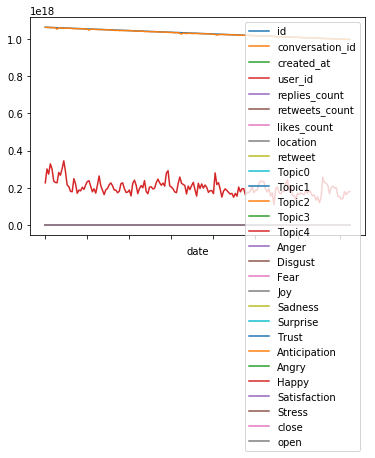

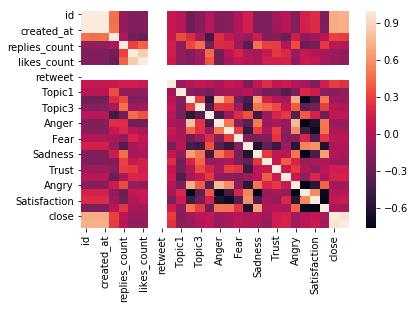

In [286]:
inpu = df['close']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['close'] = output


inpu = df['open']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['open'] = output


# df['close'].plot()
# df[['Topic0','Topic1','Topic2','Topic3','Topic4']].plot()
# plt.show()



# df.to_csv("msft_7rows.csv")
df.plot()
plt.show()
# df = df.drop('close', axis=1)
# df = df.drop('Topic0', axis=1)
# df = df.drop('Topic1', axis=1)
# df = df.drop('Topic2', axis=1)
# df = df.drop('Topic3', axis=1)
# df = df.drop('Topic4', axis=1)
# df.plot()
# # plt.gcf().set_size_inches(25, 35)
# plt.show()
cor = df.corr(method='spearman') #Calculate the correlation of the above variables
sns.heatmap(cor, square = False) #Plot the correlation as heat map